## IMDM Movie Reviews using the Bag-of-Words Approach

## [ Please star/upvote if u like it. ]

#### IMPORTING MODULES

In [1]:
import nltk
nltk.download('all',halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#modelling algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
··········


In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


#### LOADING THE DATASET

In [0]:
train = pd.read_csv(r'drive/Colab Notebooks/IMDB Movie Review Kaggle/Keras/labeledTrainData.tsv', header=0,\
                    delimiter="\t", quoting=3)

test = pd.read_csv(r'drive/Colab Notebooks/IMDB Movie Review Kaggle/Keras/testData.tsv',header=0,\
                    delimiter="\t", quoting=3)

In [6]:
print("the train shape is : ",train.shape)
print("the test shape is : ",test.shape)

the train shape is :  (25000, 3)
the test shape is :  (25000, 2)


In [0]:
df=train.copy()

In [8]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [0]:
df.drop('id',axis=1,inplace=True)

In [10]:
df.head()

,sentiment,review
0,1,"""With all this stuff going down at the moment ..."
1,1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,0,"""The film starts with a manager (Nicholas Bell..."
3,0,"""It must be assumed that those who praised thi..."
4,1,"""Superbly trashy and wondrously unpretentious ..."


In [11]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [12]:
df['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [13]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [14]:
test['review'][0]

'"Naturally in a film who\'s main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce\'s short story lends the film a ready made structure as perfect as a polished diamond, but the small changes Huston makes such as the inclusion of the poem fit in neatly. It is truly a masterpiece of tact, subtlety and overwhelming beauty."'

#### DATA CLEANING & PRE-PROCESSING

I have cleaned the dataset by removing the HTML tags and extracting the alphanumeric characters.

I have also removed the stopwords using nltk.

**Also for data pre-processing we can use either a stemmer or a lemmatize but for me both seem to decrease the accuracy.;(**

In [0]:
def clean_reviews(review):
    
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()
    
    # 4. Remove stopwords
    ps=PorterStemmer()
    le=WordNetLemmatizer()   # both are reducing accuracies are a bit.
    stop_words= set(stopwords.words("english"))     
    word_tokens= [w for w in word_tokens if not w in stop_words]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [0]:
df['review']=df['review'].apply(clean_reviews)
test['review']=test['review'].apply(clean_reviews)

In [18]:
print("the train shape is : ",df.shape)
print("the test shape is : ",test.shape)

the train shape is :  (25000, 2)
the test shape is :  (25000, 2)


In [19]:
df['review'][0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [20]:
test['review'][0]

'naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty'

#### EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

In DTM the values are the TFidf values. 

**Also I have tuned the parameters of the Tfidf vectorizer.**

**Some important points:- **

1) I tried **CountVectorizer** also but that seem to decrease the accuracy.

2) **max_features** depends on your computing power and also on eval. metric. Try the value that gives best eval. metric and doesn't limits processing power.

3) default values for **min_df & max_df** worked well.

4) can try different values for **ngram_range**. I tried bigrams and trigrams also but bigrams ie ngram_range=(1,2) seem to work well.

In [0]:
# extracting features from the text. Can use CountVectorizer also.
vect =TfidfVectorizer(stop_words=stop_words,max_features=10000,ngram_range=(1,2)) # to play with. min_df,max_df,max_features etc...
X_tfidf=vect.fit_transform(df['review'])
Y_tfidf=df['sentiment'].values

In [0]:
a=vect.get_feature_names()
# print(a)
# print(type(a))

In [24]:
idf = vect.idf_
print(type(idf))
print(len(idf))
# print(dict(zip(vect.get_feature_names(), idf)))

<class 'numpy.ndarray'>
10000


In [25]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['movie'])
print(dd['gannon'])

movie gannon
1.490474933318278
8.824086010056313


Note that the word **movie** has the **least 'idf value'** which indicates that is quite frequently appearing in reviews which is obvious and similarly **gannon** has the **highest 'idf value'** which shows that it is a rare word.

**While creating the DTM I have sorted the columns acc. to IDF values and so more frequent words will be the earlier columns.**

In [0]:
# creating a DataFrame from the extraced features. This is basically Document Term Matrix (DTM)
dtm_df=pd.DataFrame(X_tfidf.toarray(), columns=l) 

In [27]:
dtm_df.head(20)

,movie,one,film,like,good,time,even,would,see,really,...,myrtle,gypo,scarecrows,creasy,macarthur,kells,dillinger,flavia,gamera,gannon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


**Lots of zeros as expected and a value!=0 implies the Tfidf value of a word /feature in a specific document.**

#### SPLITTING INTO TRAIN & VAL SETS

In [0]:
x_train,x_test,y_train,y_test=train_test_split(dtm_df,Y_tfidf,test_size=0.20,random_state=42)

#### MODELLING ALGOS

#### Logistic Regression

In [29]:
clf_lr=LogisticRegression(C=10)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.8868


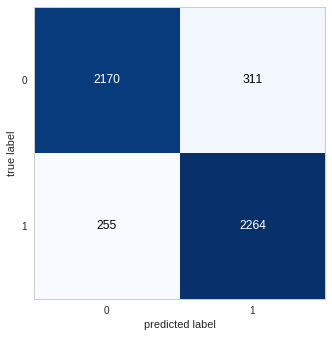

In [30]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

#### Gaussian Naive Bayes

In [31]:
clf_nb=GaussianNB()
clf_nb.fit(x_train,y_train)
pred=clf_nb.predict(x_test)
print(accuracy_score(pred,y_test))

0.824


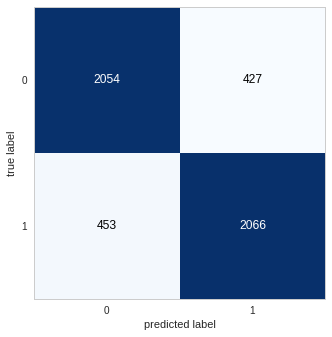

In [32]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

#### Multinomial Naive Bayes

In [33]:
clf_mnb=MultinomialNB()
clf_mnb.fit(x_train,y_train)
pred=clf_mnb.predict(x_test)
print(accuracy_score(pred,y_test))

0.8684


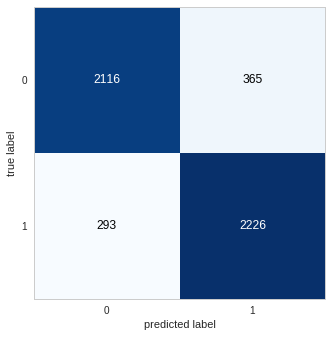

In [34]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

#### SAVING SUBMISSION ONTO KAGGLE

In [0]:
vect_test =TfidfVectorizer(stop_words=stop_words,max_features=10000,ngram_range=(1,2))
test_tfidf=vect_test.fit_transform(test['review'])
dtm_test=pd.DataFrame(test_tfidf.toarray(), columns=vect_test.get_feature_names()) 

In [0]:
pred=clf_lr.predict(dtm_test)
d={'id':test['id'],'sentiment':pred}
answer=pd.DataFrame(d)
answer.to_csv('answer-bow-tfidf.csv',index=False)
from google.colab import files
files.download('answer-bow-tfidf.csv')

## THE END!!!

## [Please star/upvote if u like it. ]